In [1]:
## 求相关系数矩阵

In [152]:
import numpy as np
import pandas as pd
df = pd.read_csv("整个有色板块数据.csv",encoding='utf-8')
print(df)
corr = df.corr(method='pearson')
# print(corr)
corr = np.absolute(corr)
print(corr)
corr.to_csv('板块corr.csv',sep=',',encoding='utf_8_sig')

     Unnamed: 0     有色板块开盘价  有色板块等权平均市场收益率  有色板块日收益率  有色板块日无风险收益率   有色板块日震幅  \
0             0   55.948283       0.003205  0.126524     0.000025  9.294889   
1             1   61.883451      -0.000658  0.106627     0.000025  5.039996   
2             2   65.571994      -0.013728  0.221804     0.000024  9.054557   
3             3   69.347265      -0.014399  0.177888     0.000023  7.281184   
4             4   73.288921      -0.002295  0.024931     0.000023  8.342882   
..          ...         ...            ...       ...          ...       ...   
540         540  150.373850      -0.007782 -0.006052     0.000020 -3.745803   
541         541  150.167524       0.013092 -0.024872     0.000020 -2.953628   
542         542  147.836330      -0.012364 -0.042652     0.000019  4.649763   
543         543  139.784923       0.000251 -0.076534     0.000019  5.987733   
544         544  134.799983      -0.011800 -0.031770     0.000043  1.544035   

       有色板块市净率     有色板块市现率      有色板块成交量    有色板块换手率 

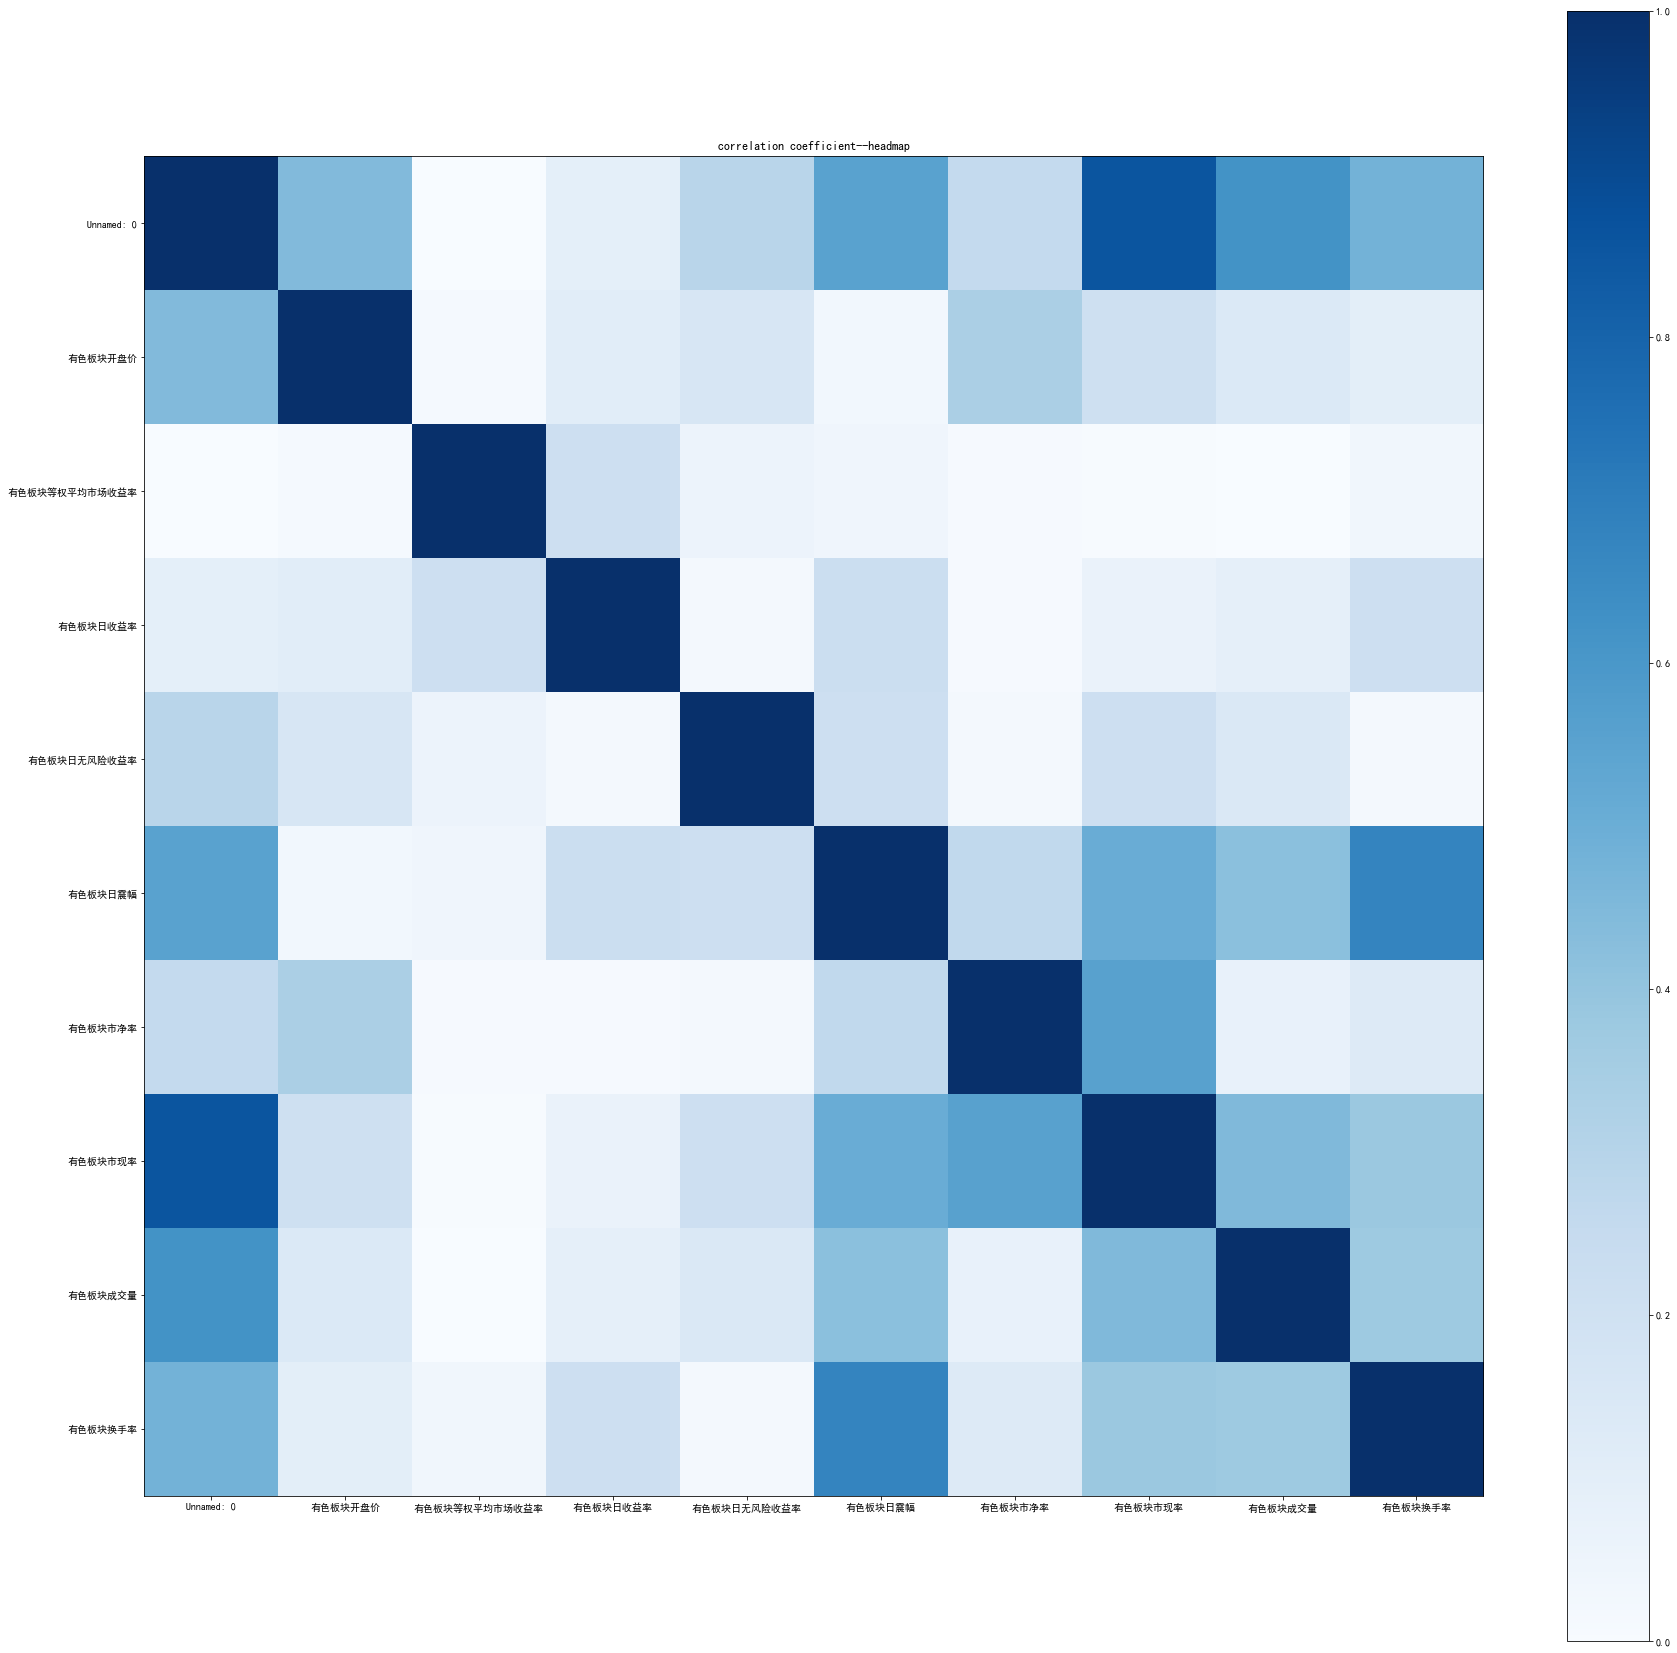

In [153]:
from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
cmap = cm.Blues
fig = plt.figure(figsize=(30,30))
ax=fig.add_subplot(111)
map = ax.imshow(corr, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
plt.title('correlation coefficient--headmap')
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)
ax.set_xticks(range(len(corr)))
ax.set_xticklabels(corr.columns)
plt.colorbar(map)
plt.savefig('./板块corr.jpg')
plt.show()

In [154]:
from statsmodels.tsa.stattools import grangercausalitytests
for index_1 in ['有色板块开盘价','有色板块等权平均市场收益率','有色板块日收益率','有色板块日无风险收益率','有色板块日震幅','有色板块市净率','有色板块市现率']:
    for index_2 in ['有色板块成交量','有色板块换手率']:
        print('-'*40)
        print(index_1+'    with    '+index_2)
        #print(df[[index_1, index_2]])
        grangercausalitytests(df[[index_1, index_2]], maxlag=5)
        print('-'*40)


----------------------------------------
有色板块开盘价    with    有色板块成交量

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0593  , p=0.8077  , df_denom=541, df_num=1
ssr based chi2 test:   chi2=0.0597  , p=0.8070  , df=1
likelihood ratio test: chi2=0.0596  , p=0.8071  , df=1
parameter F test:         F=0.0593  , p=0.8077  , df_denom=541, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0817  , p=0.9215  , df_denom=538, df_num=2
ssr based chi2 test:   chi2=0.1650  , p=0.9208  , df=2
likelihood ratio test: chi2=0.1650  , p=0.9208  , df=2
parameter F test:         F=0.0817  , p=0.9215  , df_denom=538, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1161  , p=0.9506  , df_denom=535, df_num=3
ssr based chi2 test:   chi2=0.3530  , p=0.9498  , df=3
likelihood ratio test: chi2=0.3528  , p=0.9498  , df=3
parameter F test:         F=0.1161  , p=0.9506  , df_denom=535, df_num=3

Granger Causality
number 

In [155]:
matrix = []

def append(x):
    x -= x.mean()
    x /= x.std()
    matrix.append(x.tolist())

append(df['有色板块日震幅'][5:])
append(df['有色板块日震幅'][4:-1])
append(df['有色板块日震幅'][2:-3])
append(df['有色板块日震幅'][1:-4])
append(df['有色板块日震幅'][0:-5])

append(df['有色板块市现率'][5:])
append(df['有色板块市现率'][4:-1])

append(df['有色板块日无风险收益率'][1:-4])
append(df['有色板块日无风险收益率'][0:-5])

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(matrix)
pca_matric = pca.transform(matrix)
# 转置
pca_matric_T = pca_matric.T
print(pca.explained_variance_ratio_)
weight = pca.explained_variance_ratio_

[0.23630633 0.19211755 0.14586832 0.11882186 0.09548409 0.07598917]


In [157]:
X = np.array(matrix)
COV = np.dot(X, X.T)/539
print(COV)

W, V = np.linalg.eig(COV)
print("特征值")
print(W)
print("特征向量")
ww = []
for i in range(6):
    print(i)
    print(V.T[i])
    print(V.T[i]*weight[i])
    temp = V.T[i]*weight[i]
    ww.append(temp.tolist())

[[1.         0.39530261 0.4073503  0.38805583 0.33777408 0.50832625
  0.08062706 0.0892548  0.16294506]
 [0.39530261 1.         0.48260679 0.44549131 0.4638189  0.49049044
  0.3513976  0.1392388  0.08472634]
 [0.4073503  0.48260679 1.         0.54304074 0.57670696 0.46988646
  0.36072063 0.08767174 0.12639703]
 [0.38805583 0.44549131 0.54304074 1.         0.5702761  0.46715943
  0.22501167 0.21924545 0.08691652]
 [0.33777408 0.4638189  0.57670696 0.5702761  1.         0.44804189
  0.38387967 0.14587637 0.20501754]
 [0.50832625 0.49049044 0.46988646 0.46715943 0.44804189 1.
  0.0686618  0.22331422 0.24010013]
 [0.08062706 0.3513976  0.36072063 0.22501167 0.38387967 0.0686618
  1.         0.04488978 0.00641921]
 [0.0892548  0.1392388  0.08767174 0.21924545 0.14587637 0.22331422
  0.04488978 1.         0.21469913]
 [0.16294506 0.08472634 0.12639703 0.08691652 0.20501754 0.24010013
  0.00641921 0.21469913 1.        ]]
特征值
[3.6015959  1.2271853  0.98509567 0.82175015 0.64741646 0.52574492
 

In [158]:
w_sum = []
weight_sum = weight.sum()
print("权值相加为：")
print(weight_sum)
print("向量为：")
for i in range(9):
    w_sum.append(np.array(ww).T[i].sum()/weight_sum)
print(w_sum)
print('归一化后为')
w_sum_nor = w_sum/np.array(w_sum).sum()
print(w_sum_nor)

权值相加为：
0.864587314892404
向量为：
[-0.298707304758265, -0.09815593195515673, -0.04863714950144173, -0.09218131490558279, 0.007950856443453247, -0.20409252358863814, 0.1023191176153974, -0.17137885722436655, -0.008442606284534469]
归一化后为
[ 0.36817187  0.12098215  0.05994775  0.11361814 -0.00979983  0.25155436
 -0.12611349  0.21123311  0.01040594]


In [159]:
m,n = np.array(matrix).shape
emotion = []
matrix_np = np.array(matrix)
matrix_np_T = matrix_np.T
for i in range(n):
    # 加权降维
    #print(matrix_np_T[i])
    emotion.append((matrix_np_T[i]*w_sum_nor).sum())

print(emotion)

[-0.02478218333714668, 2.6116991946940686, 2.396578515274126, 1.053948518548715, 0.5740809846140593, 1.0081274363677957, 0.7812882000400102, 0.2474777688062371, 0.42084683400564127, 0.4959982089742961, 0.23767112048947386, 0.2107914631045705, 1.000302596778733, 0.886709003095073, 0.9060825057618216, 0.8779836311118647, 0.655543704071857, 0.8864872700122984, 0.5609650116904396, 0.7664451506670753, 0.9776755938143775, 0.9353512238080229, 0.718533219978224, 0.23854330676619728, 0.3366925119781756, 0.0681010808326221, -0.11090502756476245, 0.4987854437020444, 0.8196153263417567, 0.06487294451339813, 0.26923129181497096, 0.5347925867504424, 0.4771678702989957, 0.11615456989812546, 0.3156263955624127, 0.7479806101200341, 0.5294987320486058, 0.02391792467641729, 0.17366896340381327, 0.43851850037655743, 0.16435445119679398, 0.20572608558233568, 0.47326664588131123, -0.10614289594728178, -0.5227058919312129, 0.4162323467861365, 1.1967070724261302, 1.0650107672198184, 0.7934124284764692, 0.0833

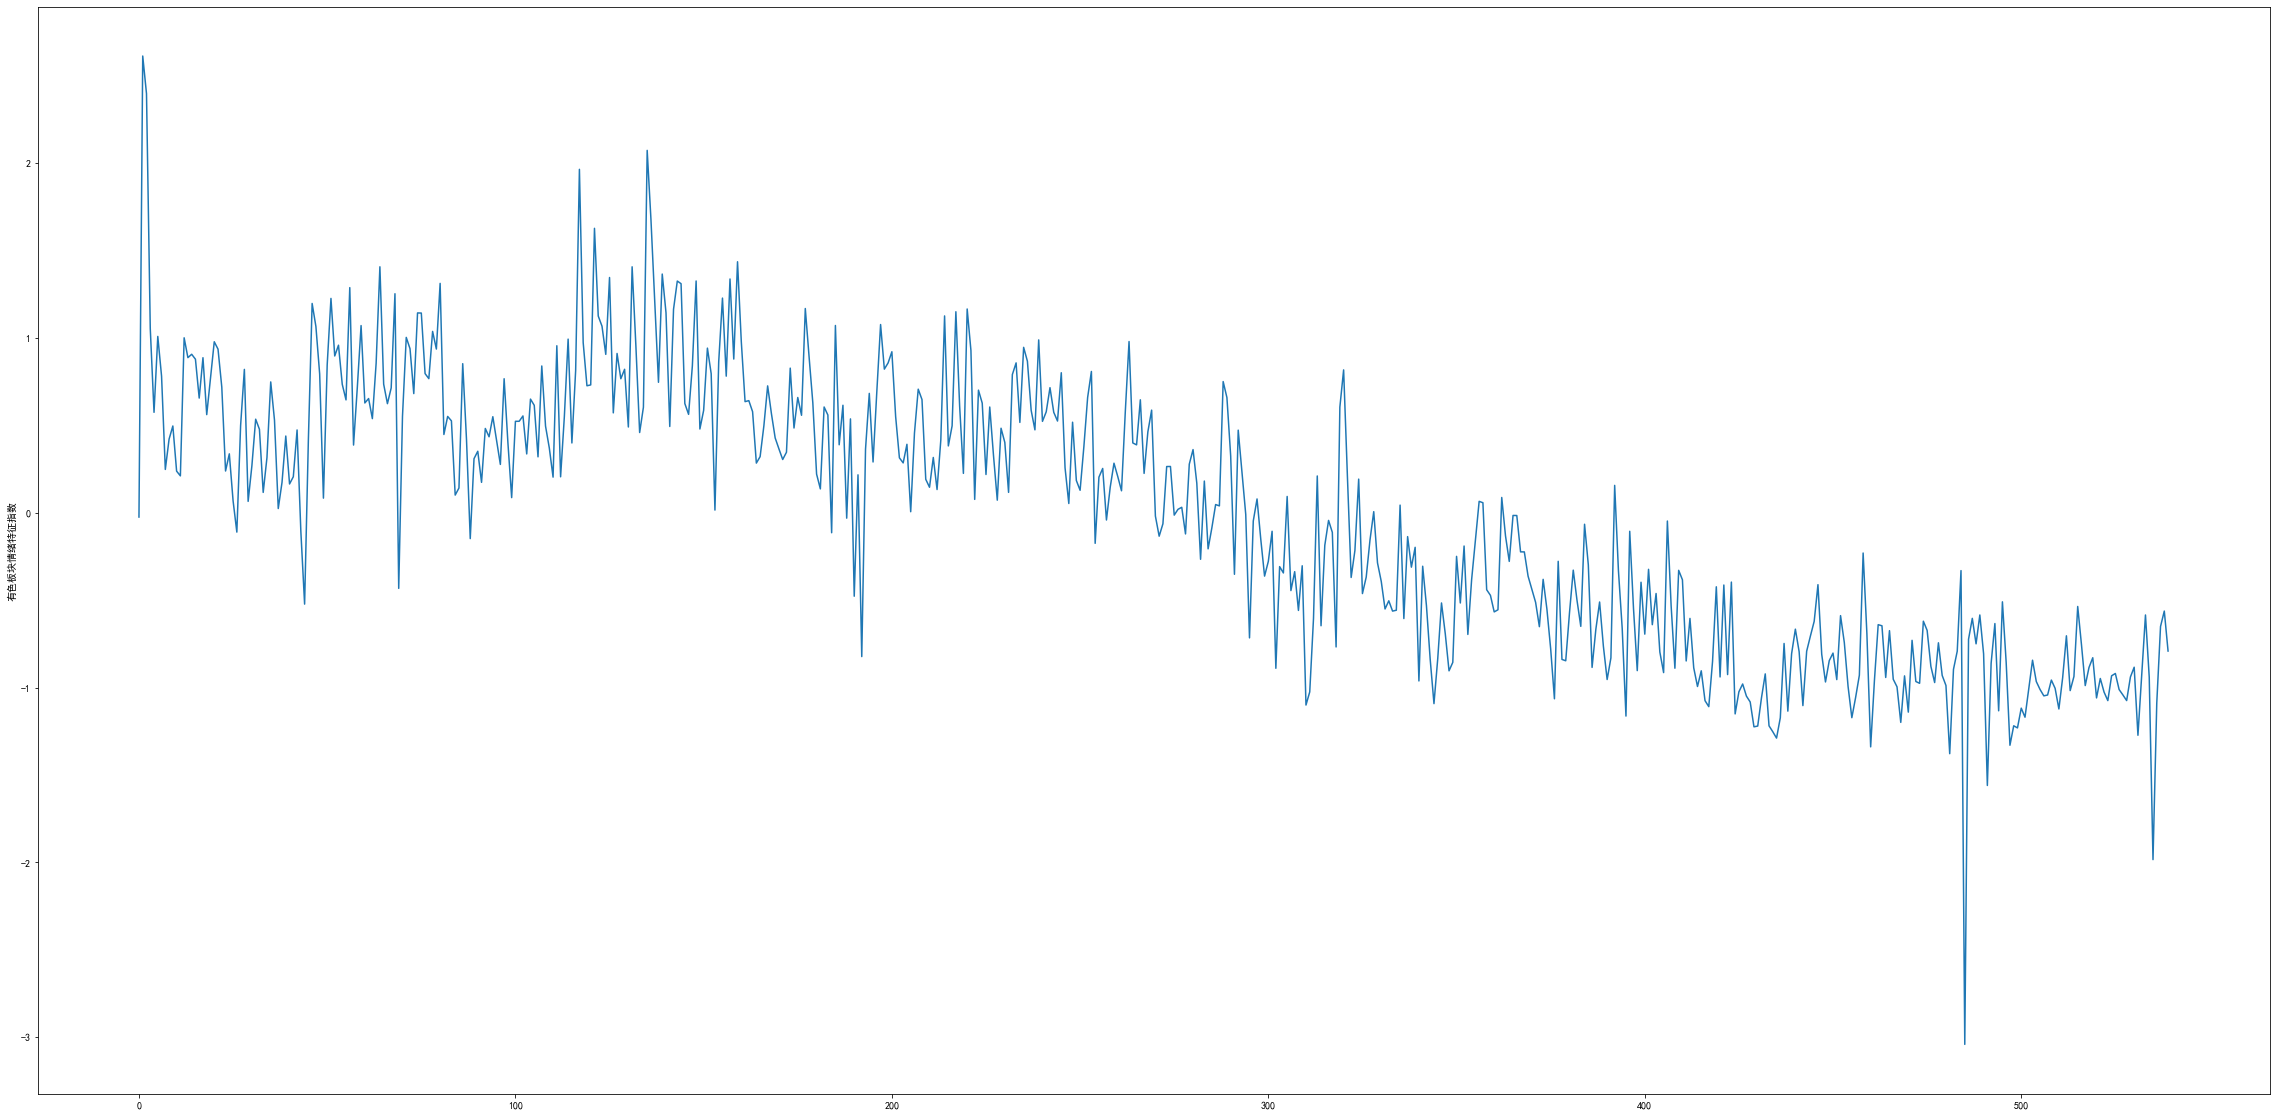

In [160]:
fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(111)
ax1.plot(range(n),emotion)
ax1.set_ylabel('有色板块情绪特征指数')
plt.savefig('有色板块情绪指数.jpg')
plt.show()

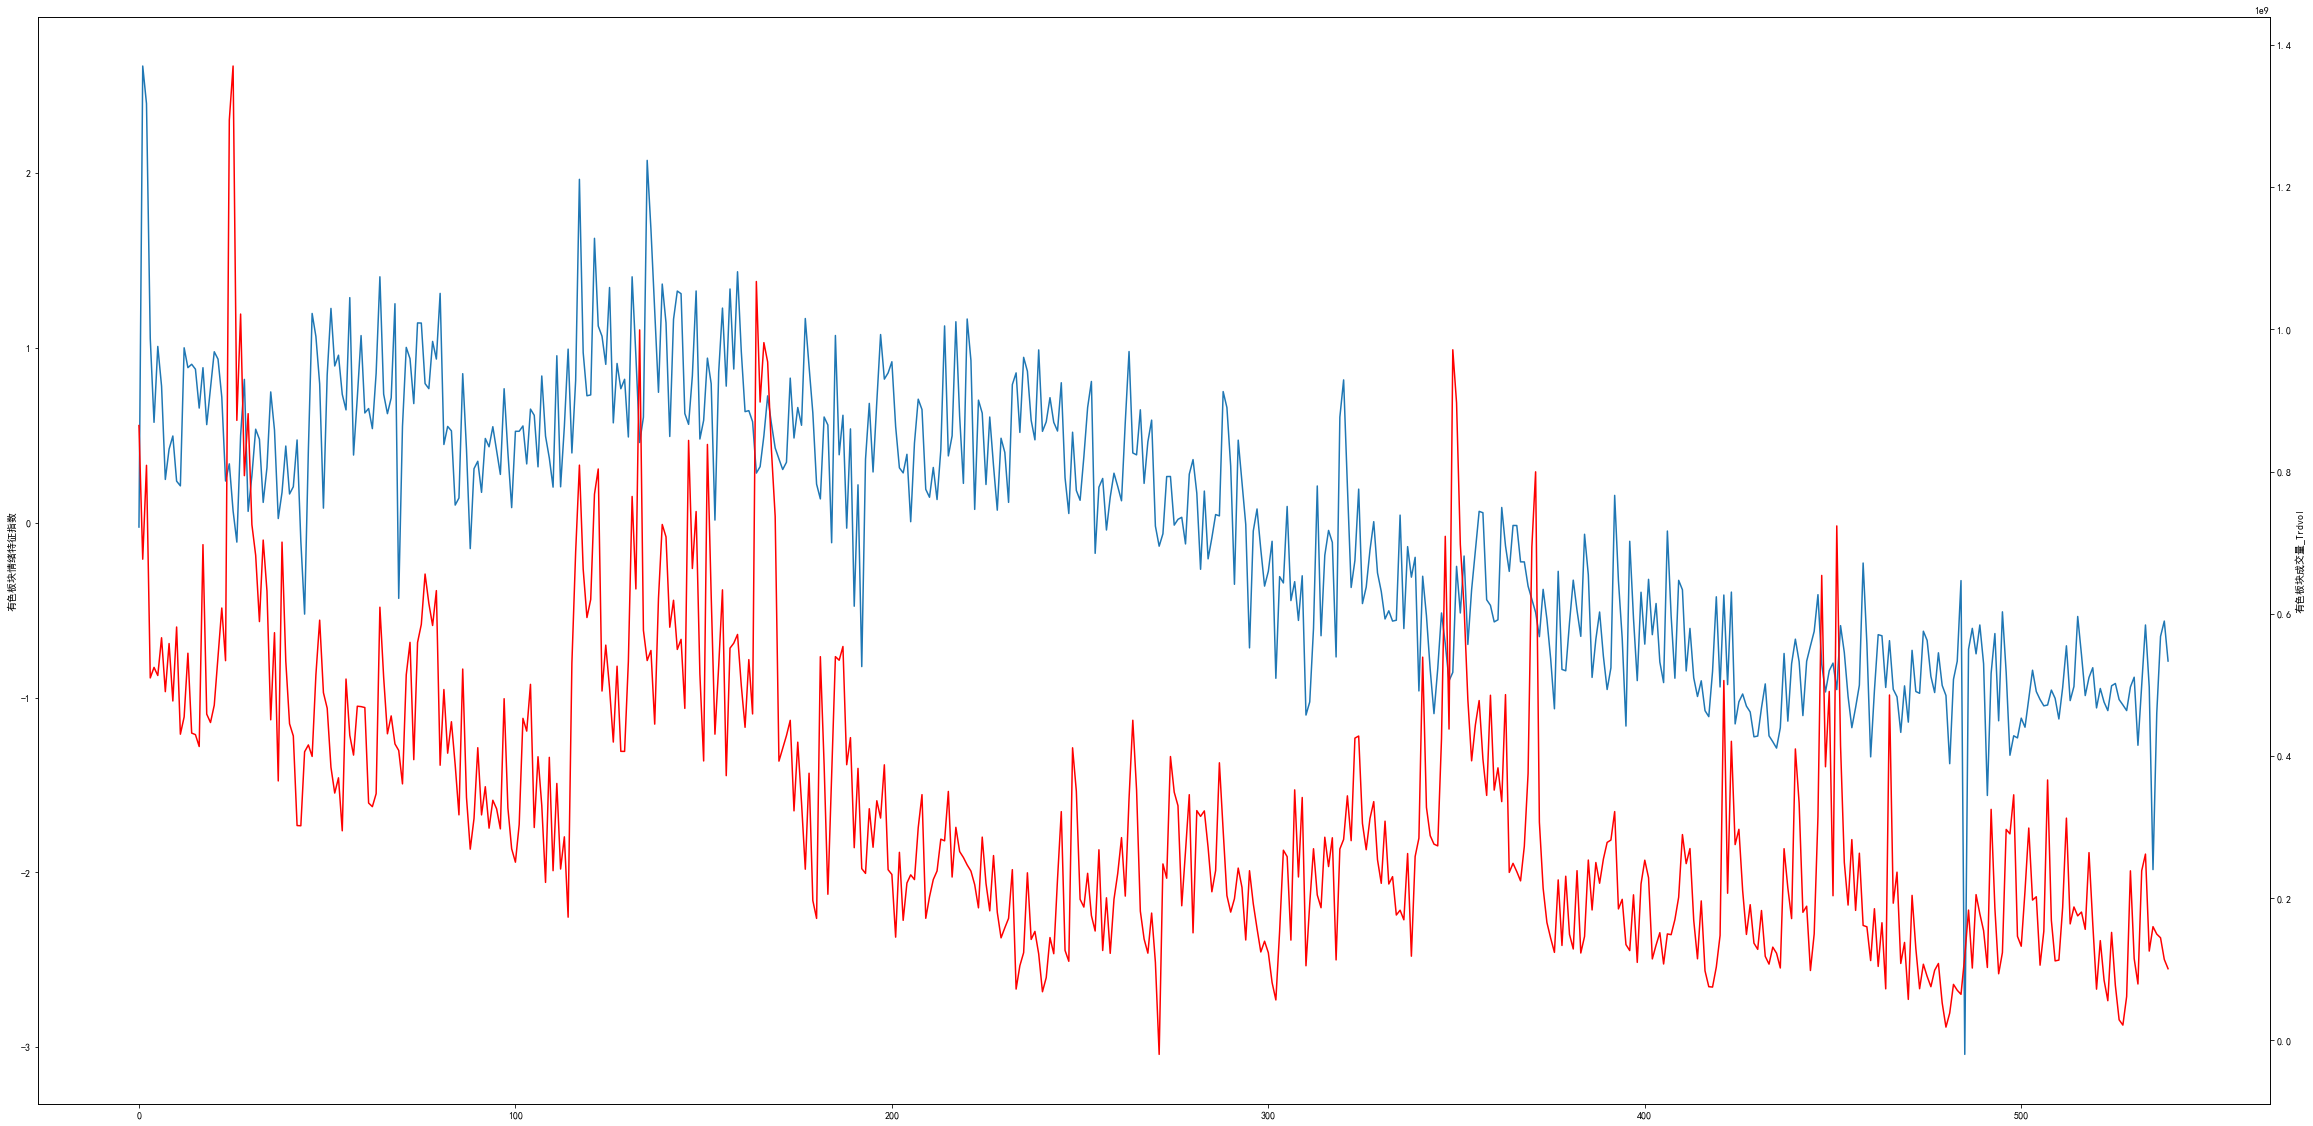

In [161]:
fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(111)
ax1.plot(range(n),emotion)
ax2 = ax1.twinx()
ax2.plot(range(n),df['有色板块成交量'][5:],'r')
ax1.set_ylabel('有色板块情绪特征指数')
ax2.set_ylabel('有色板块成交量_Trdvol')
plt.savefig('有色板块情绪指数with成交量.jpg')
plt.show()

In [162]:
for index in ['有色板块成交量','有色板块换手率']:
    print('-'*40)
    print('有色板块情绪指数  with    '+index)
    temp = []
    temp.append(emotion)
    temp.append(df[index][5:].tolist())
    temp = pd.DataFrame(temp).T
    grangercausalitytests(temp, maxlag=4)
    print('-'*40)
    print(index + '  with  有色板块情绪指数')
    temp = []
    temp.append(df[index][5:].tolist())
    temp.append(emotion)
    temp = pd.DataFrame(temp).T
    grangercausalitytests(temp, maxlag=4)
    print('-'*40)

----------------------------------------
有色板块情绪指数  with    有色板块成交量

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.8460 , p=0.0011  , df_denom=536, df_num=1
ssr based chi2 test:   chi2=10.9067 , p=0.0010  , df=1
likelihood ratio test: chi2=10.7978 , p=0.0010  , df=1
parameter F test:         F=10.8460 , p=0.0011  , df_denom=536, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5058  , p=0.0826  , df_denom=533, df_num=2
ssr based chi2 test:   chi2=5.0587  , p=0.0797  , df=2
likelihood ratio test: chi2=5.0350  , p=0.0807  , df=2
parameter F test:         F=2.5058  , p=0.0826  , df_denom=533, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7221  , p=0.5391  , df_denom=530, df_num=3
ssr based chi2 test:   chi2=2.1950  , p=0.5329  , df=3
likelihood ratio test: chi2=2.1905  , p=0.5338  , df=3
parameter F test:         F=0.7221  , p=0.5391  , df_denom=530, df_num=3

Granger Causality
number o

In [163]:
from statsmodels.tsa.api import VAR
VAR_data = []
VAR_data.append(emotion)
VAR_data.append(df['有色板块成交量'][5:].tolist())
VAR_data = pd.DataFrame(VAR_data).T
model = VAR(VAR_data)
maxlags = 4
results = model.fit(maxlags=maxlags, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Jul, 2023
Time:                     13:33:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    35.2672
Nobs:                     536.000    HQIC:                   35.1797
Log likelihood:          -10916.2    FPE:                1.79427e+15
AIC:                      35.1234    Det(Omega_mle):     1.73550e+15
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.048876         0.037164           -1.315           0.188
L1.0          0.339554         0.042117            8.062           0.000
L1.1         -0.000000         0.000000           -0.099           0.921
L2.0          0.071466 

0.8805970149253731


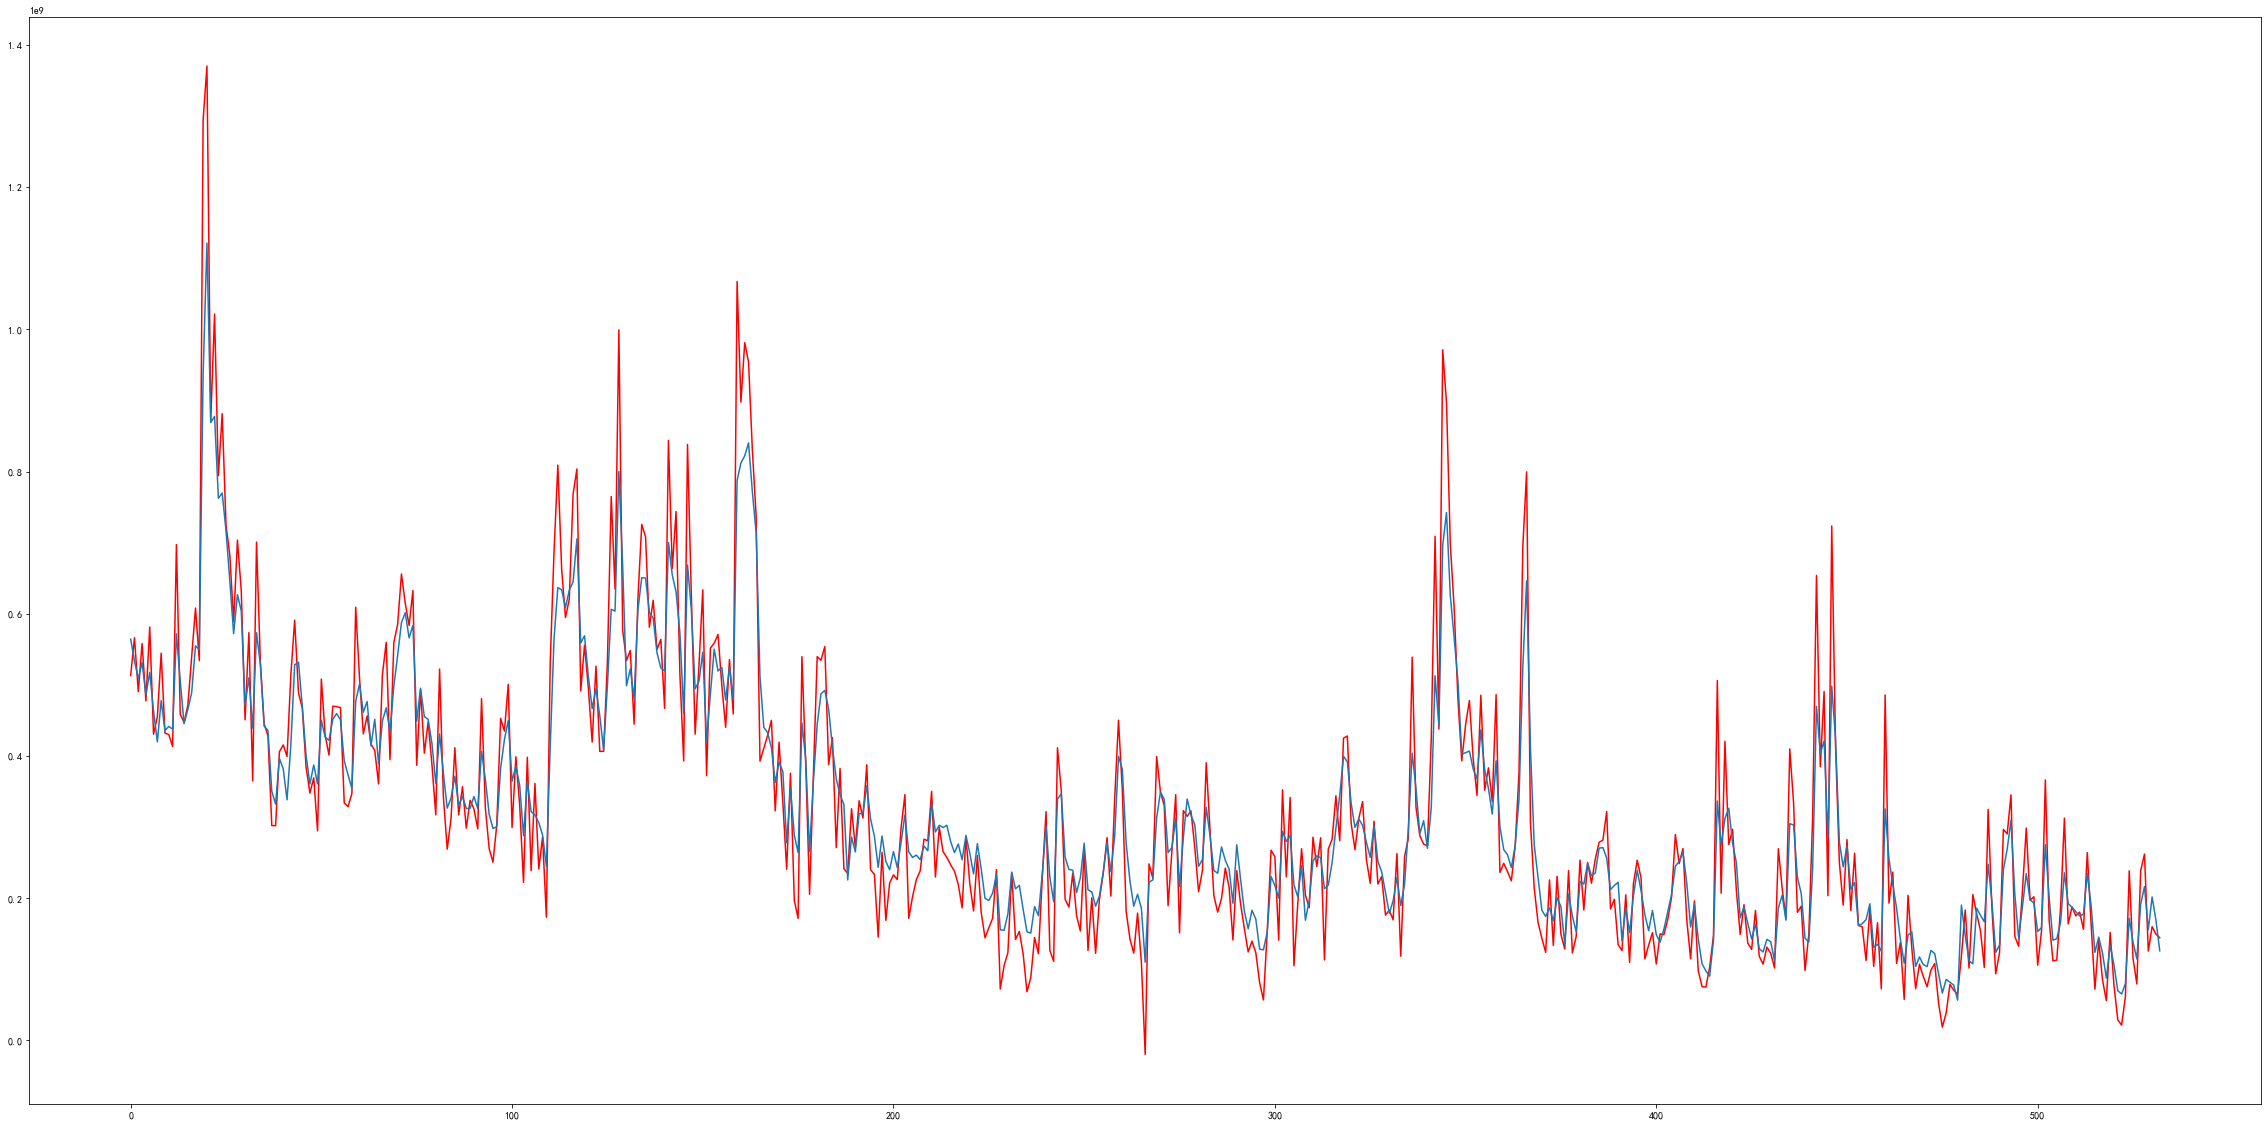

In [164]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
lag_order = results.k_ar
y1 = []
y2 = []
count = 0
for i in range(n-maxlags-1):
    forecast_input = VAR_data.values[i:i+maxlags]
    forecast = results.forecast(forecast_input, steps=1)
    y1.append(forecast[0][1])
    y2.append(VAR_data.values[i+maxlags+1][1])
    if abs(forecast[0][1]-VAR_data.values[i+maxlags+1][1]) < 0.17*1e9:
        count +=1

print(count/(n-maxlags))


fig = plt.figure(figsize=(40,20))
plt.plot(range(533),y2[:-2],'r')
plt.plot(range(533),y1[2:])
plt.savefig('有色板块成交量预测.jpg')
plt.show()


In [165]:
from statsmodels.tsa.api import VAR
VAR_data = []
VAR_data.append(emotion)
VAR_data.append(df['有色板块换手率'][5:].tolist())
VAR_data = pd.DataFrame(VAR_data).T
model = VAR(VAR_data)
maxlags = 4
results = model.fit(maxlags=maxlags, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Jul, 2023
Time:                     13:33:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  0.0943698
Nobs:                     536.000    HQIC:                0.00678508
Log likelihood:          -1489.84    FPE:                   0.951711
AIC:                   -0.0495004    Det(Omega_mle):        0.920538
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.026930         0.027466           -0.980           0.327
L1.0          0.282280         0.046379            6.086           0.000
L1.1          0.014127         0.005597            2.524           0.012
L2.0          0.080981 

0.8824626865671642


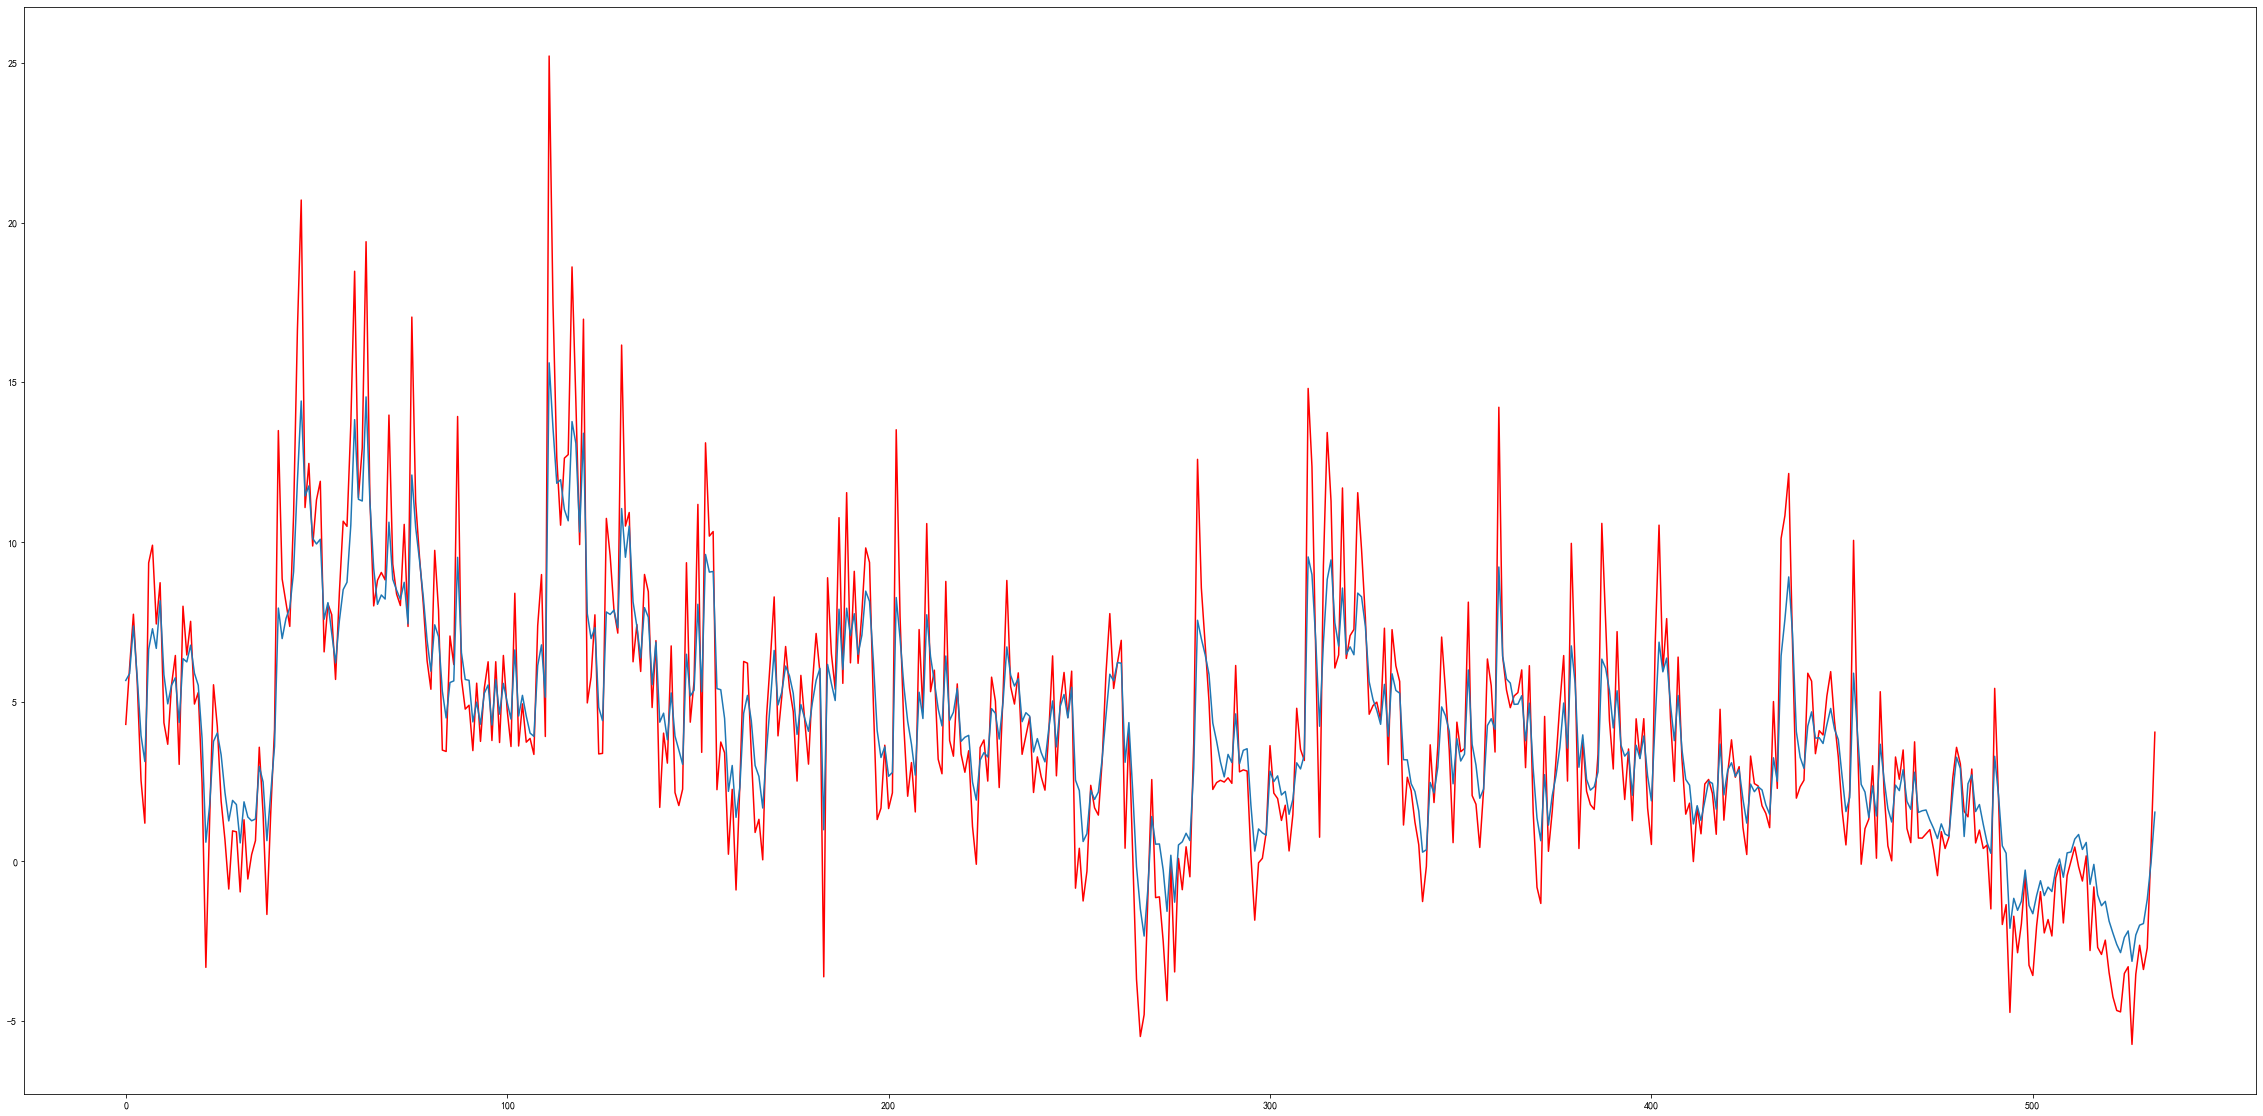

In [166]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
lag_order = results.k_ar
y1 = []
y2 = []
count = 0
for i in range(n-maxlags-1):
    forecast_input = VAR_data.values[i:i+maxlags]
    forecast = results.forecast(forecast_input, steps=1)
    y1.append(forecast[0][1])
    y2.append(VAR_data.values[i+maxlags+1][1])
    if abs(forecast[0][1]-VAR_data.values[i+maxlags+1][1]) < 5:
        count +=1

print(count/(n-maxlags))


fig = plt.figure(figsize=(40,20))
plt.plot(range(533),y2[:-2],'r')
plt.plot(range(533),y1[2:])
plt.savefig('有色板块换手率预测.jpg')
plt.show()
